In [1]:
# Import pandas 
import pandas as pd
import numpy as np
  
# reading csv file
# r stands for raw string, helps with unicode error (slashes)
filepath = r"C:\Users\krawc\OneDrive\Documents\DB\datasets\sklearn\wine_data.csv"
df1 = pd.read_csv(filepath, encoding = 'utf8')

In [2]:
from sklearn import datasets
wine = datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
trainX=wine.data[:-10]
trainy=wine.target[:-10]

testX=wine.data[-10:]
testy=wine.target[-10:]

target_names=wine.target_names 
feature_names=wine.feature_names 

In [4]:
#0 STANDARIZATION
# StandardScaler transforms data to mean-0 and variance =1

# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

#While StandardScaler() standardizes features  by removing the mean and scaling to unit variance, 
#Normalizer() rescales each sample - here, each  company's stock price - independently of the other.

#0 Normalization
# Import Normalizer
#from sklearn.preprocessing import Normalizer
# Create a normalizer: normalizer
#normalizer = Normalizer()

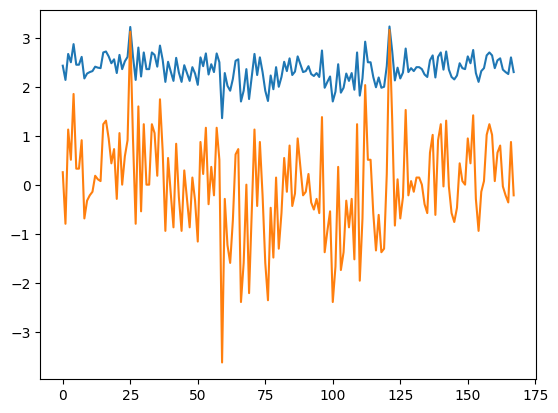

In [5]:
import matplotlib.pyplot as plt
# just to show transformation
scaler.fit(trainX)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled= scaler.transform(trainX)

plt.plot(trainX[:,2])
plt.plot(scaled[:,2])



In [6]:
# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(trainX)

# Calculate the cluster labels: labels
labels = pipeline.predict(trainX)

#moje manipulacje
d=dict(zip(range(len(target_names)),target_names))
varieties=pd.Series(trainy).apply(lambda x: d[x]).values

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels , 'varieties':varieties})
# Create crosstab: ct
ct = pd.crosstab(df['labels'] ,df['varieties'])

# Display ct
print(ct)

c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\U

varieties  class_0  class_1  class_2
labels                              
0                0       65        0
1                0        3       38
2               59        3        0


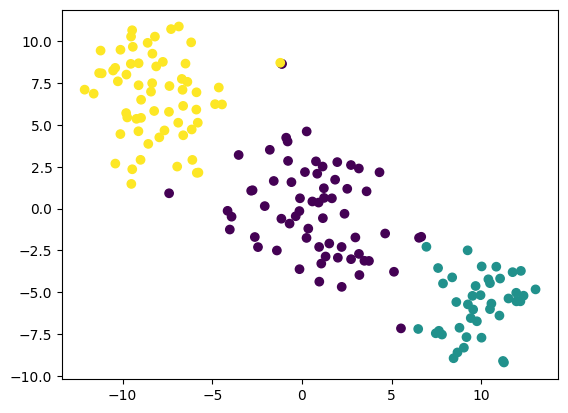

In [7]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(scaled)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=labels)
plt.show()

# PCA visualisation

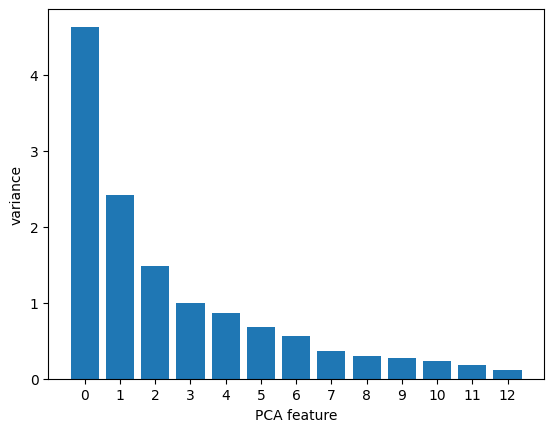

In [8]:
    # how many intrinsic dimensions

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(trainX)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [9]:
    # how many intrinsic dimensions you have to set n_components - idealy to intrinsic dimention

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA(n_components=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(trainX)

# Transform the scaled samples: pca_features
pca_features = pipeline.transform(trainX)

# Print the shape of pca_features
print(trainX.shape)
print(pca_features.shape)

(168, 13)
(168, 3)


In [10]:
# This information is included in the pca attribute: components_. As described in the documentation, 
# pca.components_ outputs an array of [n_components, n_features], 
# so to get how components are linearly related with the different features you have to:
#wychodzi na to ze PC sa skorelowane z kazdym feature i sa ich oszacowaniem, wiec nie wiadomo z ktorego zrezygnowac

# Dump components relations with features:
pd.DataFrame(pca.components_,columns=feature_names,index = ['PC1','PC2','PC3'])


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
PC1,-0.199669,0.221730,-0.031819,0.238458,-0.172576,-0.398952,-0.423293,0.295630,-0.312652,0.009058,-0.263739,-0.361568,-0.315361
PC2,0.455684,0.248989,0.302994,-0.003036,0.263773,0.023587,-0.038689,0.067659,-0.004522,0.551687,-0.322987,-0.212738,0.329208
PC3,-0.203018,0.094472,0.632114,0.603781,0.137156,0.146455,0.156955,0.191231,0.146061,-0.125055,0.076030,0.170542,-0.111521


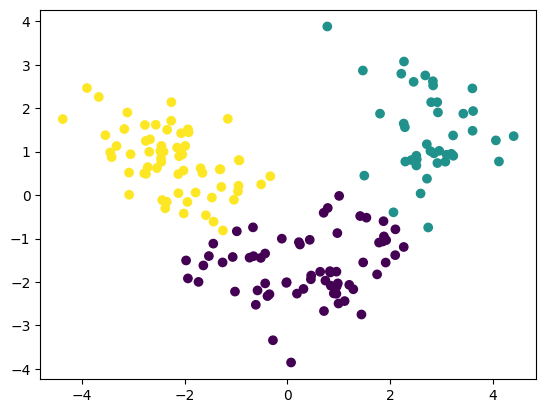

In [10]:
# Select the 0th feature: xs
xs = pca_features[:,0]

# Select the 1st feature: ys
ys = pca_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=labels)
plt.show()

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

xs = pca_features[:,0]
# Select the 1st feature: ys
ys = pca_features[:,1]
# Select the 2st feature: ys
zs = pca_features[:,2]

ax.scatter(xs, ys, zs, zdir='z',c=labels)

<Figure size 640x480 with 0 Axes>